# Jeevan Singh
# 102003691
# 3COE27

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
x_train = x_train.reshape(60000, 784)
y_train = y_train.reshape(60000, 1)
x_test = x_test.reshape(10000, 784)
y_test = y_test.reshape(10000, 1)

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 784), (60000, 1), (10000, 784), (10000, 1))

In [15]:
train = pd.DataFrame(x_train)
train['label'] = y_train
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test = pd.DataFrame(x_test)
test['label'] = y_test
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6


In [17]:
# test = pd.read_csv('./fashion-mnist_test.csv')
# train = pd.read_csv('./fashion-mnist_train.csv')

### Q1

In [19]:
labels = [0, 1]
X_train = train[train['label'].isin(labels)].reset_index(drop=True).drop('label', axis=1)
Y_train = train['label'][train['label'].isin(labels)].reset_index(drop=True)
X_train.shape, Y_train.shape

((12000, 784), (12000,))

In [20]:
X_test = test[test['label'].isin(labels)].reset_index(drop=True).drop('label', axis=1)
Y_test = test['label'][test['label'].isin(labels)].reset_index(drop=True)
X_test.shape, Y_test.shape

((2000, 784), (2000,))

In [21]:
X_train = (np.array(X_train).T)/255.
X_test = (np.array(X_test).T)/255.
Y_train = np.array(Y_train).reshape(1, -1)
Y_test = np.array(Y_test).reshape(1, -1)
X_train.shape, X_test.shape, Y_train.shape, Y_train.shape

((784, 12000), (784, 2000), (1, 12000), (1, 12000))

In [22]:
def show_image(x):
    x = x.reshape(28, 28)
    plt.imshow(x, cmap='gray')
    plt.show

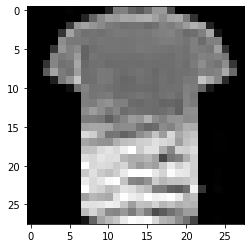

In [23]:
show_image(X_train[:, 11050])

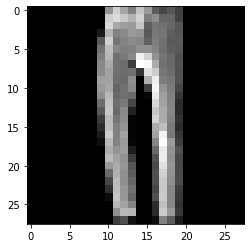

In [27]:
show_image(X_train[:, 100])

### Q2

Step by step implementation

In [28]:
def init_params(dimension):
    w = np.zeros((dimension, 1))
    b = 0
    return w, b

In [29]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [30]:
def forward_prop(w, b, X):
    z1 = np.dot(w.T,X) + b
    prediction = sigmoid(z1)
    return z1, prediction

In [31]:
def backward_prop(X, Y, prediction):
    m = X.shape[1]
    
    cost = (-1/m) * (np.sum(np.multiply(Y, np.log(prediction)) + np.multiply((1-Y), np.log(1-prediction))))

    dw = (1/m) * (np.dot(X, (prediction - Y).T))
    db = (1/m) * (np.sum(prediction - Y))

    return dw, db, cost

In [32]:
def update_params(w, b, dw, db, lr):
    w = w - lr*dw
    b = b - lr*db
    return w, b

In [33]:
def get_accuracy(prediction, Y):
    return (100 - np.mean(np.abs(prediction - Y)) * 100)

In [34]:
def get_prediction(prediction, Y_pred):
    for i in range(Y_pred.shape[1]):
        if Y_pred[0, i] <= 0.5:
            prediction[0, i] = 0
        else:
            prediction[0, i] = 1
    
    return prediction

In [35]:
def gradient_decent(X, Y, lr, epochs):
    w, b = init_params(X.shape[0])
    for i in range(epochs):
        z, prediction = forward_prop(w, b, X)
        dw, db, cost = backward_prop(X, Y, prediction)
        w, b = update_params(w, b, dw, db, lr)

        if i % 10 == 0:
            print(f'Cost after {i} epochs: {cost}')
            print(f'Accuracy after {i} epochs: {get_accuracy(get_prediction(np.zeros((1, X.shape[1])), prediction), Y)}')
    
    return w, b
        

In [36]:
def predict(X, w, b):
    m = X.shape[1]
    prediction = np.zeros((1, m))
    z = np.dot(w.T, X) + b
    Y_pred = sigmoid(z)

    get_prediction(prediction, Y_pred)
    
    return prediction

In [37]:
def s_model(X_train, Y_train, X_test, Y_test, lr, epochs):
    w, b = gradient_decent(X_train, Y_train, lr, epochs)
    Y_pred_train = predict(X_train, w, b)
    Y_pred_test = predict(X_test, w, b)

    print(f'\nTraining accuracy: {get_accuracy(Y_pred_train, Y_train)}')
    print(f'Testing accuracy: {get_accuracy(Y_pred_test, Y_test)}')
    return Y_pred_test
    

In [38]:
Y_pred = s_model(X_train, Y_train, X_test, Y_test, 0.001, 100)

Cost after 0 epochs: 0.6931471805599452
Accuracy after 0 epochs: 50.0
Cost after 10 epochs: 0.6682745363620657
Accuracy after 10 epochs: 91.83333333333333
Cost after 20 epochs: 0.6455161919657183
Accuracy after 20 epochs: 92.83333333333333
Cost after 30 epochs: 0.6244524553999928
Accuracy after 30 epochs: 93.5
Cost after 40 epochs: 0.6048209872882693
Accuracy after 40 epochs: 94.06666666666666
Cost after 50 epochs: 0.586446361429208
Accuracy after 50 epochs: 94.46666666666667
Cost after 60 epochs: 0.5692016557571397
Accuracy after 60 epochs: 94.73333333333333
Cost after 70 epochs: 0.552987791775038
Accuracy after 70 epochs: 94.925
Cost after 80 epochs: 0.5377224875371115
Accuracy after 80 epochs: 95.125
Cost after 90 epochs: 0.5233343432520158
Accuracy after 90 epochs: 95.23333333333333

Training accuracy: 95.41666666666667
Testing accuracy: 94.6


In [39]:
Y_pred[0, 1000]

0.0

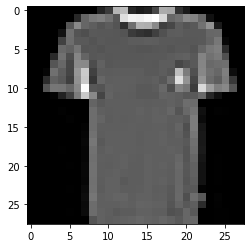

In [40]:
show_image(X_test[:, 1000])

In [44]:
Y_pred[0, 1152]

1.0

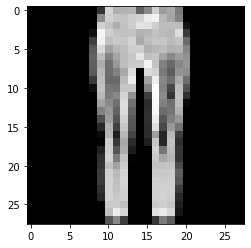

In [46]:
show_image(X_test[:, 1152])

Using tensorflow and no hidden layer

In [53]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [55]:
model.fit(X_train.T, Y_train.T, epochs=100)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.4303 - accuracy: 0.9151
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.9568
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2103 - accuracy: 0.9593
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9606
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1659 - accuracy: 0.9622
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1539 - accuracy: 0.9642
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1447 - accuracy: 0.9653
Epoch 8/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.9663
Epoch 9/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1313 - accuracy: 0.9672
Epoch 10/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1261 - accura

In [56]:
tf_pred = model.predict(X_test.T)


63/63 [==============================] - 0s 1ms/step


In [57]:
tf_pred = get_prediction(np.zeros((1, Y_test.shape[1])),tf_pred.T)

In [58]:
print(f'Accuracy of tensorflow model: {get_accuracy(tf_pred, Y_test)}')

Accuracy of tensorflow model: 98.1


In [59]:
tf_pred[0, 1234]

1.0

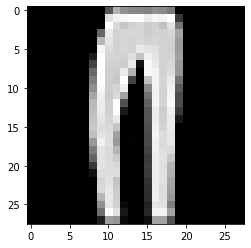

In [60]:
show_image(X_test[:, 1234])

In [61]:
tf_pred[0, 1589]

0.0

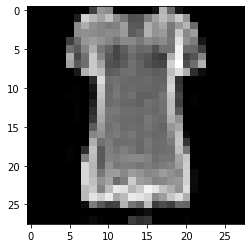

In [62]:
show_image(X_test[:, 1589])

### Q3

In [65]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [66]:
model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [67]:
model2.fit(X_train.T, Y_train.T, epochs=100)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7121 - accuracy: 0.5074
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6748 - accuracy: 0.8171
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.8873
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6587 - accuracy: 0.9135
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.9060
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.9319
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6319 - accuracy: 0.9263
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6218 - accuracy: 0.9329
Epoch 9/100
375/375 [==============================] - 2s 4ms/step - loss: 0.6109 - accuracy: 0.9279
Epoch 10/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5994 - accura

In [68]:
tf_pred2 = model2.predict(X_test.T)

63/63 [==============================] - 0s 2ms/step


In [69]:
tf_pred2 = get_prediction(np.zeros((1, Y_test.shape[1])), tf_pred2.T)

In [70]:
tf_pred2[0, 1789]

1.0

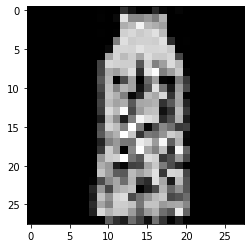

In [71]:
show_image(X_test[:, 1789])

In [72]:
tf_pred2[0, 1567]

0.0

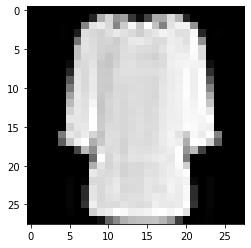

In [73]:
show_image(X_test[:, 1567])